# Tarjetas

dataset: <https://docs.google.com/spreadsheets/d/1E2QvH18DyNDw1eGqU40D_KHSEfSzbipV/edit?usp=sharing&ouid=115931210603772521641&rtpof=true&sd=true>


In [7]:
import pandas as pd
import numpy
#!pip install openpyxl

In [8]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [9]:
pwd

'/Users/usuario/PycharmProjects/pythonProject5/UCEMA/04-transformaciones'

In [10]:
path_tarjetas = "data/tarjetas.xlsx"
tarjetas = pd.read_excel(path_tarjetas)

In [11]:
tarjetas.head()

,Columna1,PreseTaciOn_Fecha,FeCha_de_Pago,cod_clearing,desc_creaing,NRo_Liquidacion,cod_sucursal,Cod_comercio,Cod_pagadora,Cod_marca_producto,importe_concepto
0,0,2022-06-15,2022-07-01,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00
1,1,2022-06-15,2022-07-01,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60
2,2,2022-06-15,2022-07-01,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70
3,3,2022-06-15,2022-07-01,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85
4,4,2022-06-15,2022-07-01,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43


### 1- Pasar todos los nombres de las columnas a minusculas

In [12]:
tarjetas.columns = tarjetas.columns.str.lower()
tarjetas

,columna1,presetacion_fecha,fecha_de_pago,cod_clearing,desc_creaing,nro_liquidacion,cod_sucursal,cod_comercio,cod_pagadora,cod_marca_producto,importe_concepto
0,0,2022-06-15,2022-07-01,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00
1,1,2022-06-15,2022-07-01,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60
2,2,2022-06-15,2022-07-01,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70
3,3,2022-06-15,2022-07-01,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85
4,4,2022-06-15,2022-07-01,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43
...,...,...,...,...,...,...,...,...,...,...,...
47275,47275,2022-07-28,2022-07-29,2900,TOTAL LIQUIDACION,143176,519,25892918,82,VISA DEBITO,97185.50
47276,47276,2022-07-28,2022-07-29,5104,"IVA CRED.FISC.COMERCIO S/ARANC 21,00%",143176,519,25892918,82,VISA DEBITO,166.03
47277,47277,2022-07-28,2022-07-29,5204,RETENCION ING.BRUTOS SIRTAC,143176,519,25892918,82,VISA DEBITO,691.84
47278,47278,2022-07-28,2022-07-29,5900,SUBTOTAL NETO DE PAGOS,143176,519,25892918,82,VISA DEBITO,97185.50


### 2-Cuantas sucursales únicas hay? ¿Cuáles?

In [13]:
tarjetas.cod_sucursal.unique()

array([716,  98, 671, 519, 241])

In [14]:
tarjetas.cod_sucursal.nunique()

5

### 3- Cuantas tarjetas de crédito distitas hay? ¿Cuáles?
¿Se te ocurre un nombre mejor para esa columna?

In [15]:
tarjetas.cod_marca_producto.unique()

array(['VISA CREDITO', 'VISA DEBITO', 'MASTERCARD', 'MASTERCARD DEBIT',
       'MAESTRO', 'ARGENCARD'], dtype=object)

In [16]:
len(tarjetas[(tarjetas['cod_marca_producto'] == 'VISA CREDITO')])

26935

In [17]:
tarjetas = tarjetas.rename(columns = {'cod_marca_producto' : 'metodo_pago'})
tarjetas

,columna1,presetacion_fecha,fecha_de_pago,cod_clearing,desc_creaing,nro_liquidacion,cod_sucursal,cod_comercio,cod_pagadora,metodo_pago,importe_concepto
0,0,2022-06-15,2022-07-01,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00
1,1,2022-06-15,2022-07-01,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60
2,2,2022-06-15,2022-07-01,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70
3,3,2022-06-15,2022-07-01,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85
4,4,2022-06-15,2022-07-01,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43
...,...,...,...,...,...,...,...,...,...,...,...
47275,47275,2022-07-28,2022-07-29,2900,TOTAL LIQUIDACION,143176,519,25892918,82,VISA DEBITO,97185.50
47276,47276,2022-07-28,2022-07-29,5104,"IVA CRED.FISC.COMERCIO S/ARANC 21,00%",143176,519,25892918,82,VISA DEBITO,166.03
47277,47277,2022-07-28,2022-07-29,5204,RETENCION ING.BRUTOS SIRTAC,143176,519,25892918,82,VISA DEBITO,691.84
47278,47278,2022-07-28,2022-07-29,5900,SUBTOTAL NETO DE PAGOS,143176,519,25892918,82,VISA DEBITO,97185.50


### 4- Cuants filas y columnas hay?


In [18]:
len(tarjetas)

47280

In [19]:
len(tarjetas.columns)

11

In [20]:
tarjetas.shape

(47280, 11)

### 5- ¿Cuanto suma el total de importe_concepto?


In [21]:
tarjetas.importe_concepto.sum()

4145618332.503

### 6- ¿Cuanto dinero se cobro por mes? Cree un lineplot para gráficarlo


In [22]:
importe_por_mes = tarjetas.groupby('fecha_de_pago').importe_concepto.sum()
importe_por_mes

fecha_de_pago
2022-07-01    1.473177e+08
2022-07-04    1.976693e+08
2022-07-05    7.024681e+08
2022-07-06    1.002753e+08
2022-07-07    1.116222e+08
2022-07-08    1.465996e+08
2022-07-11    2.870652e+08
2022-07-12    2.403649e+08
2022-07-13    1.227566e+08
2022-07-14    1.293021e+08
2022-07-15    1.469553e+08
2022-07-18    2.730872e+08
2022-07-19    2.219563e+08
2022-07-20    1.363231e+08
2022-07-21    1.431265e+08
2022-07-22    1.531738e+08
2022-07-25    2.727540e+08
2022-07-26    2.242873e+08
2022-07-27    1.235888e+08
2022-07-28    1.294521e+08
2022-07-29    1.354729e+08
Name: importe_concepto, dtype: float64

<AxesSubplot:xlabel='fecha_de_pago'>

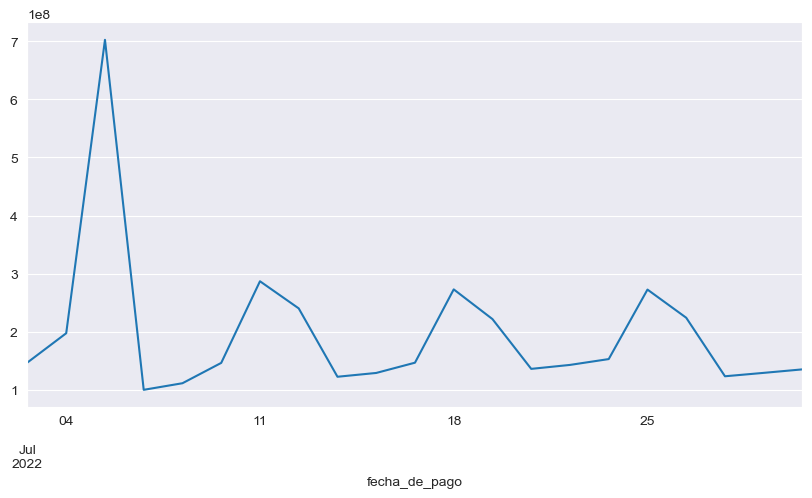

In [38]:
importe_por_mes_plot = importe_por_mes.plot.line(figsize = (10, 5))
importe_por_mes_plot

### 7- Cuanto dinero se cobro por sucursal?


In [24]:
tarjetas.groupby('cod_sucursal').importe_concepto.sum()

cod_sucursal
98     1.401451e+08
241    9.773019e+05
519    3.621125e+09
671    2.418829e+08
716    1.414878e+08
Name: importe_concepto, dtype: float64

### 8- Cuanto dinero se cobro por mes por sucursal?


In [25]:
importe_mes_sucursal = tarjetas.groupby(['fecha_de_pago', 'cod_sucursal', 'desc_creaing']).importe_concepto.sum()
importe_mes_sucursal

fecha_de_pago  cod_sucursal  desc_creaing                                
2022-07-01     98             PERCEPCION IVA R.G. 2408   3,00 %                  246.590
                             ARANCEL                                           13283.600
                             CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%       2536.308
                             CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%             444.920
                             DESCUENTO FINANC.OTORG. CUOTAS                     2118.730
                                                                                ...     
2022-07-29     716           SUBTOTAL NETO DE PAGOS                          1216257.030
                             TOTAL DEDUCCIONES                                146099.260
                             TOTAL LIQUIDACION                               1216257.030
                             VENTAS C/DESCUENTO CONTADO                       433551.900
                             VENTAS 

### 9- Cuanto dinero se cobro por mes por sucursal y por descreaing?

In [26]:
tarjetas.groupby(['fecha_de_pago', 'cod_sucursal']).importe_concepto.sum()

fecha_de_pago  cod_sucursal
2022-07-01     98              3.669431e+06
               519             1.312675e+08
               671             7.608022e+06
               716             4.772726e+06
2022-07-04     98              6.478613e+06
                                   ...     
2022-07-29     98              4.980121e+06
               241             2.472456e+04
               519             1.182347e+08
               671             6.924635e+06
               716             5.308723e+06
Name: importe_concepto, Length: 91, dtype: float64

### 10- Pase a columnas los valores presentes en desc_creaing y ponga los importes como valores y en el indice la fecha de pago y el codigo de comercio

In [27]:
tarjetas2 = pd.pivot_table(tarjetas, values = 'importe_concepto', index = ['fecha_de_pago', 'cod_sucursal'], columns = 'desc_creaing')
tarjetas2

desc_creaing                 PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago cod_sucursal                                       
2022-07-01    98                                     82.196667   
              519                                   247.968462   
              671                                   178.067500   
              716                                   110.537500   
2022-07-04    98                                    112.988000   
...                                                        ...   
2022-07-29    98                                     83.636000   
              241                                          NaN   
              519                                   217.386226   
              671                                   163.816667   
              716                                   125.275000   

desc_creaing                AJUSTE SIRTAC JUL. 1RA QUINC  \
fecha_de_pago cod_sucursal                                 
2022-07-01    98                                     NaN   
              519                                    NaN   
              671                                    NaN   
              716                                    NaN   
2022-07-04    98                                     NaN   
...                                                  ...   
2022-07-29    98                                     NaN   
              241                                    NaN   
              519                                    NaN   
              671                                    NaN   
              716                                    NaN   

desc_creaing                AJUSTE SIRTAC JUNIO 2DA QUINC  \
fecha_de_pago cod_sucursal                                  
2022-07-01    98                                      NaN   
              519                                     NaN   
              671                                     NaN   
              716                                     NaN   
2022-07-04    98                                      NaN   
...                                                   ...   
2022-07-29    98                                      NaN   
              241                                     NaN   
              519                                     NaN   
              671                                     NaN   
              716                                     NaN   

desc_creaing                ARANCEL                                       \
fecha_de_pago cod_sucursal                                                 
2022-07-01    98                                             1328.360000   
              519                                            4300.069304   
              671                                            1164.405926   
              716                                            1908.835000   
2022-07-04    98                                             2606.188889   
...                                                                  ...   
2022-07-29    98                                             1796.870000   
              241                                             114.090000   
              519                                            3739.910588   
              671                                             942.627097   
              716                                            2079.617000   

desc_creaing                CARGO  SISTEMA CUOTAS MENS                    \
fecha_de_pago cod_sucursal                                                 
2022-07-01    98                                                     NaN   
              519                                                    NaN   
              671                                                    NaN   
              716                                                    NaN   
2022-07-04    98                                                     NaN   
...                                          

In [28]:
#tarjetas[(tarjetas['metodo_pago'] == "VISA CREDITO") | (tarjetas['metodo_pago'] == "VISA DEBITO")]

### 11- Quedarse solo con tarjeta visa. Crear una columna que sume 'VENTAS C/DESCUENTO CONTADO' con
                                'VENTAS C/DTO CUOTAS FINANC. OTORG.'

In [29]:
tarjetas_visa = tarjetas[tarjetas.metodo_pago.str.contains('VISA')]
tarjetas_visa = pd.pivot_table(tarjetas_visa, values = 'importe_concepto', index = ['fecha_de_pago', 'cod_sucursal'], columns = 'desc_creaing')
tarjetas_visa[['VENTAS C/DESCUENTO CONTADO                  ', 'VENTAS C/DTO CUOTAS FINANC. OTORG.          ']]

desc_creaing                VENTAS C/DESCUENTO CONTADO                    \
fecha_de_pago cod_sucursal                                                 
2022-07-01    98                                            44459.787778   
              519                                           86832.780722   
              671                                          115303.002500   
              716                                           36181.766667   
2022-07-04    98                                            92008.337500   
...                                                                  ...   
2022-07-29    98                                            59837.200000   
              241                                                    NaN   
              519                                           76375.307476   
              671                                           83102.000000   
              716                                           48172.433333   

desc_creaing                VENTAS C/DTO CUOTAS FINANC. OTORG.            
fecha_de_pago cod_sucursal                                                
2022-07-01    98                                           107244.064000  
              519                                          268716.184655  
              671                                          479674.060000  
              716                                          179887.000000  
2022-07-04    98                                           183338.530000  
...                                                                  ...  
2022-07-29    98                                           122057.676667  
              241                                            6338.200000  
              519                                          236911.812881  
              671                                          168574.020000  
              716                                          185760.878000  

[91 rows x 2 columns]

In [30]:
tarjetas_visa = tarjetas_visa.fillna(value = 0)
tarjetas_visa['SUMA_VENTAS'] = tarjetas_visa['VENTAS C/DESCUENTO CONTADO                  ']+tarjetas_visa['VENTAS C/DTO CUOTAS FINANC. OTORG.          ']
tarjetas_visa[['VENTAS C/DESCUENTO CONTADO                  ', 'VENTAS C/DTO CUOTAS FINANC. OTORG.          ', 'SUMA_VENTAS']]

desc_creaing                VENTAS C/DESCUENTO CONTADO                    \
fecha_de_pago cod_sucursal                                                 
2022-07-01    98                                            44459.787778   
              519                                           86832.780722   
              671                                          115303.002500   
              716                                           36181.766667   
2022-07-04    98                                            92008.337500   
...                                                                  ...   
2022-07-29    98                                            59837.200000   
              241                                               0.000000   
              519                                           76375.307476   
              671                                           83102.000000   
              716                                           48172.433333   

desc_creaing                VENTAS C/DTO CUOTAS FINANC. OTORG.            \
fecha_de_pago cod_sucursal                                                 
2022-07-01    98                                           107244.064000   
              519                                          268716.184655   
              671                                          479674.060000   
              716                                          179887.000000   
2022-07-04    98                                           183338.530000   
...                                                                  ...   
2022-07-29    98                                           122057.676667   
              241                                            6338.200000   
              519                                          236911.812881   
              671                                          168574.020000   
              716                                          185760.878000   

desc_creaing                  SUMA_VENTAS  
fecha_de_pago cod_sucursal                 
2022-07-01    98            151703.851778  
              519           355548.965377  
              671           594977.062500  
              716           216068.766667  
2022-07-04    98            275346.867500  
...                                   ...  
2022-07-29    98            181894.876667  
              241             6338.200000  
              519           313287.120357  
              671           251676.020000  
              716           233933.311333  

[91 rows x 3 columns]

### 12- Quedarse solo con la tarjeta mastercard y crear una columna que sea la suma de 'PERCEPCION IVA R.G. 2408   1,50 %' y  'PERCEPCION IVA R.G. 2408   3,00 %'

In [31]:
tarjetas_mastercard = tarjetas[tarjetas.metodo_pago.str.contains('MASTERCARD')]
tarjetas_mastercard = pd.pivot_table(tarjetas_mastercard, values = 'importe_concepto', index = ['fecha_de_pago', 'cod_sucursal'], columns = 'desc_creaing')
tarjetas_mastercard[[' PERCEPCION IVA R.G. 2408   3,00 %', 'PERCEPCION IVA R.G. 2408   1,50 %']]

desc_creaing                 PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago cod_sucursal                                       
2022-07-01    519                                  1172.543333   
              671                                    80.550000   
2022-07-04    519                                  1189.867500   
              671                                   158.440000   
2022-07-05    519                                  5286.176667   
              671                                   152.229167   
2022-07-06    519                                   744.173333   
              671                                    69.850000   
2022-07-07    519                                   780.543333   
              671                                    82.950000   
2022-07-08    519                                   790.935000   
              671                                   125.150000   
2022-07-11    519                                  1732.162500   
              671                                   156.220000   
2022-07-12    519                                   996.323333   
              671                                          NaN   
2022-07-13    519                                   578.262500   
              671                                    83.590000   
2022-07-14    519                                   624.912500   
              671                                    91.900000   
2022-07-15    519                                   890.115000   
              671                                   109.060000   
2022-07-18    519                                  2287.950000   
              671                                   127.810000   
2022-07-19    519                                  1017.866667   
              671                                    77.610000   
2022-07-20    519                                   911.683333   
              671                                          NaN   
2022-07-21    519                                   767.912500   
              671                                   115.100000   
2022-07-22    519                                  1181.530000   
              671                                   138.810000   
2022-07-25    519                                  2211.586667   
              671                                   204.250000   
2022-07-26    519                                  1107.883333   
              671                                   181.080000   
2022-07-27    519                                   708.930000   
              671                                   179.130000   
2022-07-28    519                                   738.335000   
              671                                    94.230000   
2022-07-29    519                                  1048.573333   
              671                                   118.830000   

desc_creaing                PERCEPCION IVA R.G. 2408   1,50 %  
fecha_de_pago cod_sucursal                                     
2022-07-01    519                                      456.89  
              671                                         NaN  
2022-07-04    519                                      678.81  
              671                                         NaN  
2022-07-05    519                                      376.06  
              671                                         NaN  
2022-07-06    519                                     1404.46  
              671                                         NaN  
2022-07-07    519                                      318.03  
              671                                         NaN  
2022-07-08    519                                      609.59  
              671                                         NaN  
2022-07-11    519                                      596.70  
              671                                         NaN  
2022-07-12    519                                      681.58  
       

In [32]:
tarjetas_mastercard = tarjetas_mastercard.fillna(value = 0)
tarjetas_mastercard['SUMA_PERCEPCION'] = tarjetas_mastercard[' PERCEPCION IVA R.G. 2408   3,00 %']+ tarjetas_mastercard['PERCEPCION IVA R.G. 2408   1,50 %']
tarjetas_mastercard[[' PERCEPCION IVA R.G. 2408   3,00 %', 'PERCEPCION IVA R.G. 2408   1,50 %', 'SUMA_PERCEPCION']]

desc_creaing                 PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago cod_sucursal                                       
2022-07-01    519                                  1172.543333   
              671                                    80.550000   
2022-07-04    519                                  1189.867500   
              671                                   158.440000   
2022-07-05    519                                  5286.176667   
              671                                   152.229167   
2022-07-06    519                                   744.173333   
              671                                    69.850000   
2022-07-07    519                                   780.543333   
              671                                    82.950000   
2022-07-08    519                                   790.935000   
              671                                   125.150000   
2022-07-11    519                                  1732.162500   
              671                                   156.220000   
2022-07-12    519                                   996.323333   
              671                                     0.000000   
2022-07-13    519                                   578.262500   
              671                                    83.590000   
2022-07-14    519                                   624.912500   
              671                                    91.900000   
2022-07-15    519                                   890.115000   
              671                                   109.060000   
2022-07-18    519                                  2287.950000   
              671                                   127.810000   
2022-07-19    519                                  1017.866667   
              671                                    77.610000   
2022-07-20    519                                   911.683333   
              671                                     0.000000   
2022-07-21    519                                   767.912500   
              671                                   115.100000   
2022-07-22    519                                  1181.530000   
              671                                   138.810000   
2022-07-25    519                                  2211.586667   
              671                                   204.250000   
2022-07-26    519                                  1107.883333   
              671                                   181.080000   
2022-07-27    519                                   708.930000   
              671                                   179.130000   
2022-07-28    519                                   738.335000   
              671                                    94.230000   
2022-07-29    519                                  1048.573333   
              671                                   118.830000   

desc_creaing                PERCEPCION IVA R.G. 2408   1,50 %  SUMA_PERCEPCION  
fecha_de_pago cod_sucursal                                                      
2022-07-01    519                                      456.89      1629.433333  
              671                                        0.00        80.550000  
2022-07-04    519                                      678.81      1868.677500  
              671                                        0.00       158.440000  
2022-07-05    519                                      376.06      5662.236667  
              671                                        0.00       152.229167  
2022-07-06    519                                     1404.46      2148.633333  
              671                                        0.00        69.850000  
2022-07-07    519                                      318.03      1098.573333  
              671                                        0.00        82.950000  
2022-07-08    519                                      609.59      1400.525000  
              671                         

### Guardar como datasets
a- el dataset de la tarjeta visa
b- el dataset de la tarjeta mastercard
c- cuanto dinero se cobra por mes y por sucursal
d- cuanto se cobra por mes
e- crear un lineplot de cuanto se cobra por mes

In [33]:
tarjetas_visa_csv = tarjetas_visa.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)
tarjetas_visa_csv

'fecha_de_pago,cod_sucursal," PERCEPCION IVA R.G. 2408   3,00 %",AJUSTE SIRTAC JUL. 1RA QUINC,AJUSTE SIRTAC JUNIO 2DA QUINC,ARANCEL                                     ,CARGOS DE ENTIDAD                           ,"CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%","CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%     ","CRED.FISC.LEY 25063 PAG.S/DTO.F.OTORG. 10,50",DESCUENTO FINANC.OTORG. CUOTAS              ,IMPORTE NETO DE PAGOS                       ,"IVA CRED.FISC.COM.L.25063 S/DTO F.OTOR 10,50","IVA CRED.FISC.COMERCIO S/ARANC 21,00%       ","IVA PROMO CUOTAS AHORA 12/18 - 10,50%",IVA RI CRED.FISC.COMERCIO S/DTO F.OTORG     ,PER B.A.I.BR.DN.01/04,PERC.I.B. CORRIENTES R.165/00,PERCEP ING BR MISIONES R.G. 003/93,"PERCEPCION IVA R.G. 2408   1,50 %",PROMO CUOTAS AHORA 12/18,REEMBOLSOS DE ENTIDAD                       ,RETENCION IMP.GANANCIAS                     ,RETENCION ING.BRUTOS                        ,RETENCION ING.BRUTOS SIRTAC,RETENCION IVA                               ,SUBTOTAL NETO DE PAG

In [34]:
tarjetas_mastercard_csv = tarjetas_mastercard.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)
tarjetas_mastercard_csv

'fecha_de_pago,cod_sucursal," PERCEPCION IVA R.G. 2408   3,00 %",AJUSTE SIRTAC JUL. 1RA QUINC,AJUSTE SIRTAC JUNIO 2DA QUINC,ARANCEL                                     ,CARGO  SISTEMA CUOTAS MENS                  ,CARGO LIQUIDACION ELECTR.,CARGO POSNET  FIRSTDATA.COM.AR,CARGOS DE ENTIDAD                           ,"CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%","CRED FISCAL AHORA 12/18 VTA EN CUOTAS 21,00%","CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%     ","CRED.FISC.LEY 25063 PAG.S/DTO.F.OTORG. 10,50",DESCUENTO FINANC.OTORG. CUOTAS              ,IMPORTE NETO DE PAGOS                       ,"IVA CRED.FISC.COM.L.25063 S/DTO F.OTOR 10,50","IVA CRED.FISC.COMERCIO S/ARANC 21,00%       ","IVA PROMO CUOTAS AHORA 12/18 - 10,50%","IVA PROMO CUOTAS AHORA 12/18 - 21,00%",IVA RI CRED.FISC.COMERCIO S/DTO F.OTORG     ,IVA RI SERV.OPER. INT.,IVA RI SIST CUOTAS                          ,IVA RI. CARGO LIQUID. ELECT.                ,PER B.A.I.BR.DN.01/04,"PERCEPCION IVA R.G. 2408   1,50 %",PROMO CUOTAS AHO

In [35]:
importe_mes_sucursal_csv = importe_mes_sucursal.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)
importe_mes_sucursal_csv

'fecha_de_pago,cod_sucursal,desc_creaing,importe_concepto\n2022-07-01,98," PERCEPCION IVA R.G. 2408   3,00 %",246.58999999999997\n2022-07-01,98,ARANCEL                                     ,13283.599999999999\n2022-07-01,98,"CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%",2536.308\n2022-07-01,98,"CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%     ",444.92\n2022-07-01,98,DESCUENTO FINANC.OTORG. CUOTAS              ,2118.73\n2022-07-01,98,IMPORTE NETO DE PAGOS                       ,857374.72\n2022-07-01,98,"IVA CRED.FISC.COMERCIO S/ARANC 21,00%       ",2789.56\n2022-07-01,98,"IVA PROMO CUOTAS AHORA 12/18 - 10,50%",2536.3100000000004\n2022-07-01,98,IVA RI CRED.FISC.COMERCIO S/DTO F.OTORG     ,444.92\n2022-07-01,98,PROMO CUOTAS AHORA 12/18,24155.34\n2022-07-01,98,RETENCION IMP.GANANCIAS                     ,7196.95\n2022-07-01,98,RETENCION ING.BRUTOS SIRTAC,8163.04\n2022-07-01,98,RETENCION IVA                               ,18048.65\n2022-07-01,98,SUBTOTAL NETO DE PAGOS                      ,857374

In [36]:
importe_por_mes_csv = importe_por_mes.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

In [37]:
importe_por_mes_plot.figure.savefig('file.png')

Lo pase a pdf con el siguiente comando en la terminal:
jupyter-nbconvert --to PDFviaHTML 99_tarea_liquidacion_tarjetas.ipynb